In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data
df=pd.read_csv('./dataset/train.csv')
test_df=pd.read_csv('./dataset/test.csv')

#shuffle the data to improve the performance
df=df.sample(frac=1)
test_df=test_df.sample(frac=1)

In [4]:
#data overall view
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
565,0.393176,-0.081144,0.060964,-0.902998,-0.645215,-0.363105,-0.914068,-0.718401,-0.319391,-0.711757,...,-0.461225,-0.150994,0.031332,0.791479,-0.246382,-0.895878,0.052957,0.079986,3,SITTING
281,0.233985,0.007757,-0.087514,-0.377572,0.058070,-0.333234,-0.431184,0.013440,-0.311582,-0.198912,...,-0.381116,0.547228,-0.400678,0.833019,-0.271714,-0.699124,0.292002,0.094145,1,WALKING
5701,0.279708,-0.009727,-0.101145,-0.999018,-0.992134,-0.984791,-0.999136,-0.991071,-0.985518,-0.945054,...,-0.935815,0.014391,-0.658749,0.025390,-0.022057,-0.834245,0.207043,-0.019267,26,STANDING
1634,0.275977,-0.020509,-0.114452,-0.998295,-0.985227,-0.990415,-0.998375,-0.984414,-0.990143,-0.945243,...,-0.640235,0.090126,-0.193626,0.090037,-0.318116,-0.905997,0.142093,-0.032819,8,STANDING
1469,0.198934,-0.041649,-0.208719,-0.248394,-0.418125,-0.026884,-0.294487,-0.424444,0.032922,-0.112486,...,-0.668940,-0.080235,-0.385921,0.882797,-0.046086,-0.431323,0.217011,0.403901,7,WALKING_UPSTAIRS


In [5]:
#understand the data count, mean, standard devivation,etc.
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
#lets check any null values
df.isnull().values.any(),test_df.isnull().values.any()

(False, False)

In [7]:
#column data types
df.dtypes,test_df.dtypes

(tBodyAcc-mean()-X                       float64
 tBodyAcc-mean()-Y                       float64
 tBodyAcc-mean()-Z                       float64
 tBodyAcc-std()-X                        float64
 tBodyAcc-std()-Y                        float64
 tBodyAcc-std()-Z                        float64
 tBodyAcc-mad()-X                        float64
 tBodyAcc-mad()-Y                        float64
 tBodyAcc-mad()-Z                        float64
 tBodyAcc-max()-X                        float64
 tBodyAcc-max()-Y                        float64
 tBodyAcc-max()-Z                        float64
 tBodyAcc-min()-X                        float64
 tBodyAcc-min()-Y                        float64
 tBodyAcc-min()-Z                        float64
 tBodyAcc-sma()                          float64
 tBodyAcc-energy()-X                     float64
 tBodyAcc-energy()-Y                     float64
 tBodyAcc-energy()-Z                     float64
 tBodyAcc-iqr()-X                        float64
 tBodyAcc-iqr()-Y   

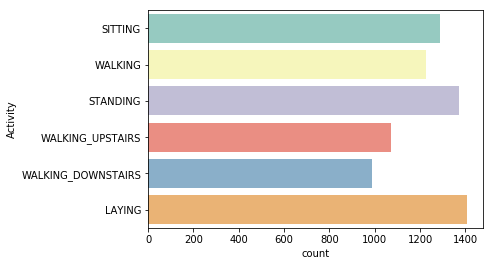

In [14]:
#Data visualization. 
#Count labels 

ax=sns.countplot(y='Activity',data=df,palette='Set3')

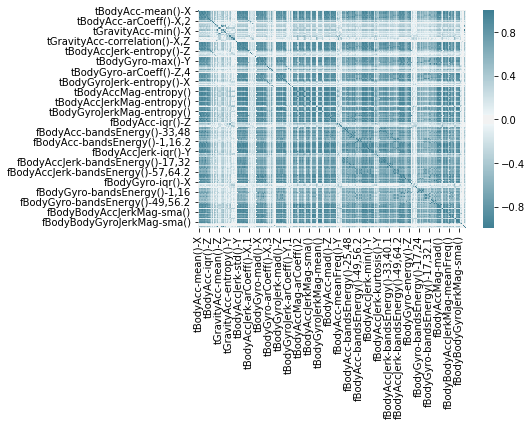

In [16]:
#Correlation Matrix

cmap=sns.diverging_palette(220,220,as_cmap=True)
ax=sns.heatmap(df.corr(),cmap=cmap)

#most of are correlated except 
#tGravityAcc-min()-X
#tGravityAcc-correlation()-X,Z
#We can drop it for better performance

In [18]:
# Towards data  modeling

#lets separate feature and labels
#train
X_train=df.drop(columns=['Activity'])
y_train=df['Activity']

#test
X_test=df.drop(columns=['Activity'])
y_test=df['Activity']

In [44]:
#check the count for train and test data
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [55]:
#again check total no of labels in each class
y_train.value_counts()

#remember each class labels count should be equal
#No of gap between class label will result to low performance of system
#seperate method when class labels are not much equilent

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [47]:
#Logistic Regression
#import libraries

acc_list=[]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf=LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_list.append(accuracy_score(y_test,y_pred))

#pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred}).head()

C:\Users\Mr.Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mr.Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [48]:
#Support vector machine
#import library
from sklearn.svm import SVC


clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_list.append(accuracy_score(y_test,y_pred))

#pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred}).head()

In [49]:
#Random Forest Algorithm
#import library
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_list.append(accuracy_score(y_test,y_pred))

#pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred}).head()

C:\Users\Mr.Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
#K Nearest Neigbor

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_list.append(accuracy_score(y_test,y_pred))

#pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred}).head()

In [51]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_list.append(accuracy_score(y_test,y_pred))

#pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred}).head()

<BarContainer object of 5 artists>

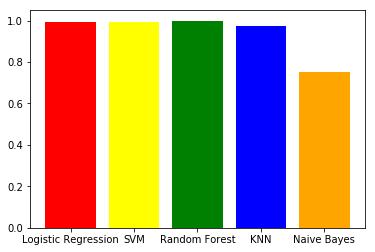

In [52]:
#Lets plot the accuracy for each algorithm

plt.bar(['Logistic Regression','SVM','Random Forest','KNN','Naive Bayes'],acc_list,color=('r','yellow','g','b','orange',),align='center')

In [39]:
#Conclusion
#all the three algortihms Logistic regression, SVM , KNN has the around 99% accuracy